In [1]:
#This is a kaggle notebook.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx
/kaggle/input/market-basket-analysis/Assignment-1_Data.csv


# Market Basket Analysis Project

## Overview
This notebook is part of a project focused on market basket analysis. We will begin by loading and preprocessing the dataset.

## Dataset Information
The dataset is stored in the file `Assignment-1_Data.xlsx` located at `/kaggle/input/market-basket-analysis/`. It contains information related to market transactions.

## Loading the Dataset
Let's start by loading the dataset into a DataFrame using pandas.


In [2]:
import pandas as pd

# Load the dataset
dataset_path = '/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx'
df = pd.read_excel(dataset_path)

# **Initial Exploration**

We'll perform an initial exploration of the dataset to understand its structure and characteristics.

In [3]:
# Display basic information about the dataset
print("Number of rows and columns:", df.shape)
print("\nData Types and Missing Values:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

Number of rows and columns: (522064, 7)

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB
None

First few rows of the dataset:
   BillNo                             Itemname  Quantity                Date  \
0  536365   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00   
1  536365                  WHITE METAL LANTERN         6 2010-12-01 08:26:00   
2  536365       CR

# Preprocessing

We'll preprocess the data to ensure it's ready for analysis.

In [4]:
#Check Missing Values
print("Missing Values:")
print(df.isnull().sum())

#Drop Rows with Missing Values
df.dropna(inplace=True)


Missing Values:
BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64


In [5]:
# Convert dataframe into transaction data
transaction_data = df.groupby(['BillNo', 'Date'])['Itemname'].apply(lambda x: ', '.join(x)).reset_index()

#Drop Unnecessary Columns
columns_to_drop = ['BillNo', 'Date']
transaction_data.drop(columns=columns_to_drop, inplace=True)

# Save the transaction data to a CSV file
transaction_data_path = '/kaggle/working/transaction_data.csv'
transaction_data.to_csv(transaction_data_path, index=False)

In [6]:
# Display the first few rows of the transaction data
print("\nTransaction Data for Association Rule Mining:")
print(transaction_data.head())
transaction_data.shape


Transaction Data for Association Rule Mining:
                                            Itemname
0  WHITE HANGING HEART T-LIGHT HOLDER, WHITE META...
1  HAND WARMER UNION JACK, HAND WARMER RED POLKA DOT
2  ASSORTED COLOUR BIRD ORNAMENT, POPPY'S PLAYHOU...
3  JAM MAKING SET WITH JARS, RED COAT RACK PARIS ...
4                           BATH BUILDING BLOCK WORD


(18192, 1)

# Phase 4 starts from here

## Formatting the transaction data in a suitable format for analysis

Developing the preprocessed data into analysis. Split the 'Itemname' column in `transaction_data` into individual items using `str.split(', ', expand=True)`.Concatenate the original DataFrame (`transaction_data`) with the items DataFrame (`items_df`) using `pd.concat`.Drop the original 'Itemname' column since individual items are now in separate columns.Display the resulting DataFrame.

In [7]:
# Split the 'Itemname' column into individual items
items_df = transaction_data['Itemname'].str.split(', ', expand=True)

# Concatenate the original DataFrame with the new items DataFrame
transaction_data = pd.concat([transaction_data, items_df], axis=1)

# Drop the original 'Itemname' column
transaction_data = transaction_data.drop('Itemname', axis=1)

# Display the resulting DataFrame
print(transaction_data.head())

                                  0                            1    \
0  WHITE HANGING HEART T-LIGHT HOLDER          WHITE METAL LANTERN   
1              HAND WARMER UNION JACK    HAND WARMER RED POLKA DOT   
2       ASSORTED COLOUR BIRD ORNAMENT    POPPY'S PLAYHOUSE BEDROOM   
3            JAM MAKING SET WITH JARS  RED COAT RACK PARIS FASHION   
4            BATH BUILDING BLOCK WORD                         None   

                              2                                    3    \
0  CREAM CUPID HEARTS COAT HANGER  KNITTED UNION FLAG HOT WATER BOTTLE   
1                            None                                 None   
2       POPPY'S PLAYHOUSE KITCHEN    FELTCRAFT PRINCESS CHARLOTTE DOLL   
3  YELLOW COAT RACK PARIS FASHION         BLUE COAT RACK PARIS FASHION   
4                            None                                 None   

                              4                                   5    \
0  RED WOOLLY HOTTIE WHITE HEART.        SET 7 BABUSHKA NESTI

# Association Rules - Data Mining
## Converting Items to Boolean Columns

To prepare the data for association rule mining, we convert the items in the `transaction_data` DataFrame into boolean columns using one-hot encoding. This is achieved through the `pd.get_dummies` function, which creates a new DataFrame (`df_encoded`) with boolean columns representing the presence or absence of each item.

In [8]:
# Convert items to boolean columns
df_encoded = pd.get_dummies(transaction_data, prefix='', prefix_sep='').groupby(level=0, axis=1).max()

# Save the transaction data to a CSV file
df_encoded.to_csv('transaction_data_encoded.csv', index=False)


## Association Rule Mining
We apply the Apriori algorithm to perform association rule mining on the encoded transaction data. The `min_support` parameter is set to 0.007 to filter out infrequent itemsets. The resulting frequent itemsets are then used to generate association rules based on a minimum confidence threshold of 0.5.Finally, we print the generated association rules.

In [9]:
# Load transaction data into a DataFrame
df_encoded = pd.read_csv('transaction_data_encoded.csv')

from mlxtend.frequent_patterns import apriori, association_rules

# Association Rule Mining
frequent_itemsets = apriori(df_encoded, min_support=0.007, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Display information of the rules
print("Association Rules:")
print(rules.head())

Association Rules:
                         antecedents                        consequents  \
0            (CHOCOLATE BOX RIBBONS)           (6 RIBBONS RUSTIC CHARM)   
1  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
2      (60 TEATIME FAIRY CAKE CASES)  (PACK OF 72 RETROSPOT CAKE CASES)   
3   (ALARM CLOCK BAKELIKE CHOCOLATE)       (ALARM CLOCK BAKELIKE GREEN)   
4   (ALARM CLOCK BAKELIKE CHOCOLATE)        (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.012368            0.039193  0.007036    0.568889  14.515044   
1            0.018525            0.054529  0.010059    0.543027   9.958409   
2            0.034631            0.054529  0.017315    0.500000   9.169355   
3            0.017150            0.042931  0.011379    0.663462  15.454151   
4            0.017150            0.032652  0.009125    0.532051  16.294742   

   leverage  conviction  zhangs_metric  
0  0.006551    2.228

# Visualization 

## Visualizing Market Basket Analysis Results

We use matplotlib and seaborn libraries to create a scatterplot visualizing the results of the market basket analysis. The plot depicts the relationship between support, confidence, and lift for the generated association rules.


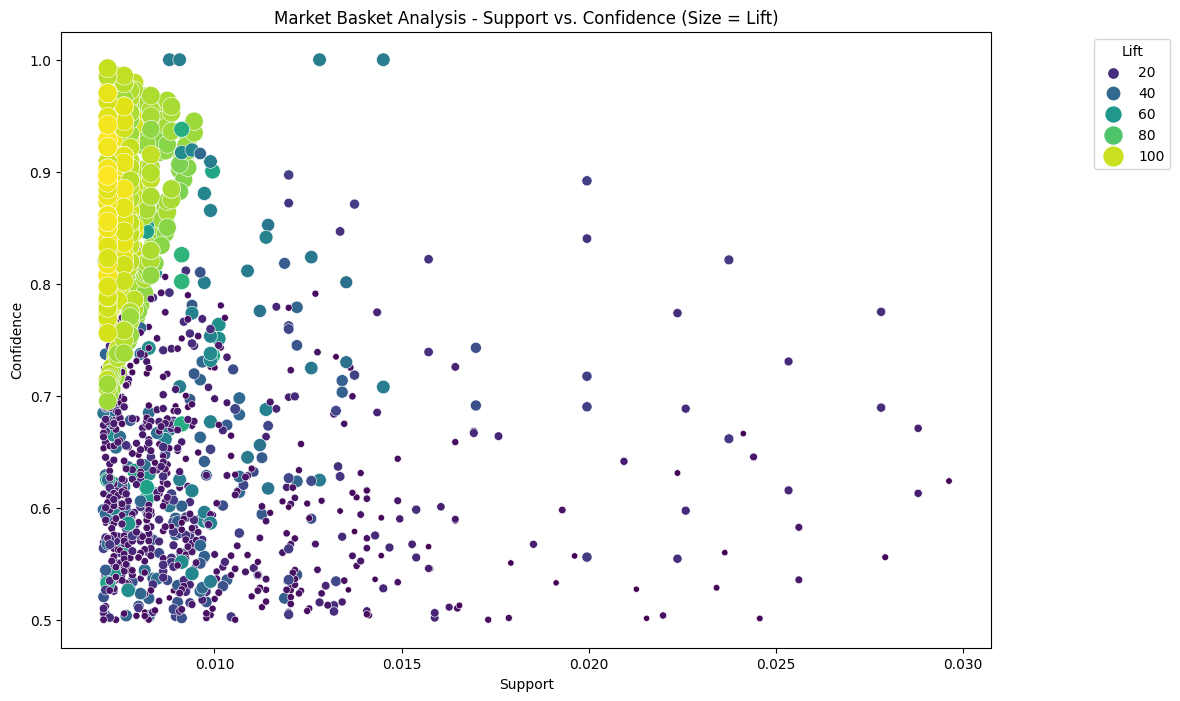

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot scatterplot for Support vs. Confidence
plt.figure(figsize=(12, 8))
sns.scatterplot(x="support", y="confidence", size="lift", data=rules, hue="lift", palette="viridis", sizes=(20, 200))
plt.title('Market Basket Analysis - Support vs. Confidence (Size = Lift)')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


## Interactive Market Basket Analysis Visualization

We leverage the Plotly Express library to create an interactive scatter plot visualizing the results of the market basket analysis. This plot provides an interactive exploration of the relationship between support, confidence, and lift for the generated association rules.


In [11]:
import plotly.express as px

# Convert frozensets to lists for serialization
rules['antecedents'] = rules['antecedents'].apply(list)
rules['consequents'] = rules['consequents'].apply(list)

# Create an interactive scatter plot using plotly express
fig = px.scatter(rules, x="support", y="confidence", size="lift",
                 color="lift", hover_name="consequents",
                 title='Market Basket Analysis - Support vs. Confidence',
                 labels={'support': 'Support', 'confidence': 'Confidence'})

# Customize the layout
fig.update_layout(
    xaxis_title='Support',
    yaxis_title='Confidence',
    coloraxis_colorbar_title='Lift',
    showlegend=True
)

# Show the interactive plot
fig.show()


## Interactive Network Visualization for Association Rules

We utilize the NetworkX and Plotly libraries to create an interactive network graph visualizing the association rules. This graph represents relationships between antecedent and consequent items, showcasing support as edge weights.

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges from association rules
for idx, row in rules.iterrows():
    G.add_node(tuple(row['antecedents']), color='skyblue')
    G.add_node(tuple(row['consequents']), color='orange')
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['support'])

# Set node positions using a spring layout
pos = nx.spring_layout(G)

# Create an interactive plot using plotly
edge_x = []
edge_y = []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        )
    )
)

# Customize the layout
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
)

# Create the figure
fig = go.Figure(data=[edge_trace, node_trace], layout=layout)

# Show the interactive graph
fig.show()


## Interactive Sunburst Chart for Association Rules

We use Plotly Express to create an interactive sunburst chart visualizing association rules. This chart represents the relationships between antecedent and consequent items, showcasing lift as well as support through color intensity.


In [13]:
import plotly.express as px

# Combine antecedents and consequents into a single column for each rule
rules['rule'] = rules['antecedents'].astype(str) + ' -> ' + rules['consequents'].astype(str)

# Create a sunburst chart
fig = px.sunburst(rules, path=['rule'], values='lift', 
                  title='Market Basket Analysis - Sunburst Chart',
                  color='support', color_continuous_scale='YlGnBu')

# Customize the layout
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()
